**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

# Types of Algorithm used :

 1  K-Means

 2 Hierarchical Clustering

 3 K-Mode 

 4 K-Prototype

## K-Means Clustering:

## 1 Importing the important Libraries and Data:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import datetime as dt 

import sklearn 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree 

## Accessing the data from the Source:

In [2]:
retail_df = pd.read_csv(r"C:\Users\Garvit\Downloads\ML_Complete\ML_UG\Course_4_ML_1\4_UnSupervisedLearning\Data\online_retail.csv", sep=",", encoding="ISO-8859-1", header=0)

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 2 Cleaning the data:

#### Number of Null Enteries in the data set 

In [5]:
 retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Percentage of null enteries in the dataset

In [6]:
 round(retail_df.isnull().sum()/len(retail_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# Dropping of all the null values as customer ID is missing and descrition is very less

retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [8]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
# new_column: amount
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


## 3: Prepare the data for Modelling:

- R (Recency): Number of days since last purchase

- F (Frequency): Number of tracsactions

- M (Monetary): Total amount of transactions (revenue contributed)

In [11]:
test1 =  retail_df[["CustomerID","amount"]]
test1.head()

,CustomerID,amount
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34


In [12]:
grouped_df = retail_df.groupby("CustomerID")['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
# # frequency
frequency =  retail_df.groupby('CustomerID')['InvoiceDate'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:

# merge the two dfs
grouped_df = pd.merge(grouped_df,frequency, on = "CustomerID", how  = "inner")
grouped_df.head()

,CustomerID,amount,InvoiceDate
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [15]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [16]:
# recency
# convert to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
# Finding the recency:
max_date = retail_df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
min_date = min( retail_df['InvoiceDate'])
min_date

Timestamp('2010-12-01 08:26:00')

In [19]:
# compute the diff
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [20]:
# recency
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [21]:
## Conactenating the date also in grouped_df

grouped_df = pd.merge(grouped_df,last_purchase, on = "CustomerID", how  = "inner")
grouped_df.head()

,CustomerID,amount,InvoiceDate,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [22]:
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [23]:
max_amount =  max(grouped_df['amount'])
max_amount 

279489.0199999999

In [24]:
min_amount =  min(grouped_df['amount'])
min_amount

-4287.63

In [25]:
purchased_value_more_then_zero =  grouped_df[grouped_df['amount'] < 0]
print("Totalcount :",grouped_df['amount'].count())
print("Transaction where amount is less then zero")
purchased_value_more_then_zero.head()

Totalcount : 4372
Transaction where amount is less then zero


,CustomerID,amount,frequency,recency
89,12454.0,-5.684342e-14,30,52 days 21:43:00
125,12503.0,-1.126000e+03,1,337 days 00:59:00
127,12505.0,-4.500000e+00,1,300 days 23:11:00
212,12605.0,-7.500000e+00,3,364 days 21:09:00
264,12666.0,-2.274400e+02,2,358 days 22:08:00


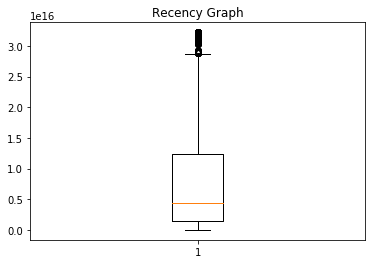

In [26]:
plt.boxplot(grouped_df['recency'])
plt.title("Recency Graph")
plt.show()


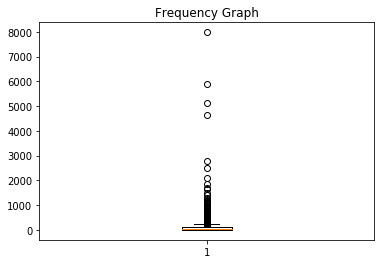

In [27]:
plt.boxplot(grouped_df['frequency'])
plt.title("Frequency Graph")
plt.show()

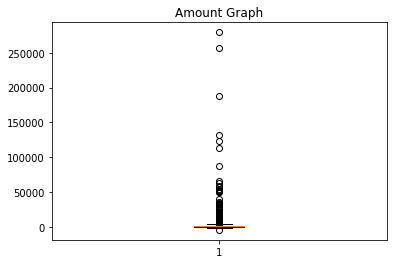

In [28]:
plt.boxplot(grouped_df['amount'])
plt.title("Amount Graph")
plt.show()

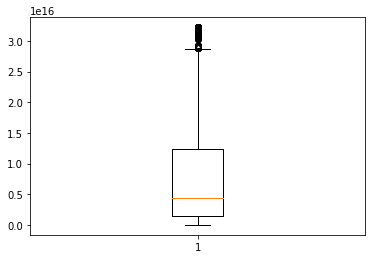

In [29]:
plt.boxplot(grouped_df['recency'])
plt.show()

In [30]:
# two types of outliers:
# - statistical
# - domain specific

In [31]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [32]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

In [33]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4371
Data columns (total 4 columns):
CustomerID    4293 non-null float64
amount        4293 non-null float64
frequency     4293 non-null int64
recency       4293 non-null int64
dtypes: float64(2), int64(2)
memory usage: 167.7 KB


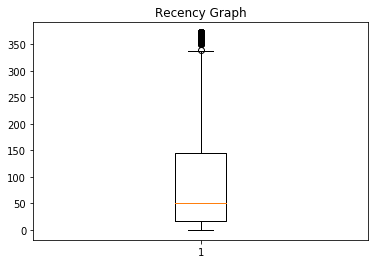

In [34]:
plt.boxplot(grouped_df['recency'])
plt.title("Recency Graph")
plt.show()


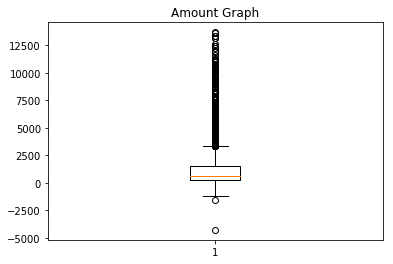

In [35]:
plt.boxplot(grouped_df['amount'])
plt.title("Amount Graph")
plt.show()


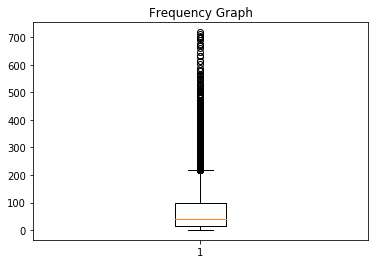

In [36]:
plt.boxplot(grouped_df['frequency'])
plt.title("Frequency Graph")
plt.show()


In [37]:
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [38]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4371
Data columns (total 4 columns):
CustomerID    4293 non-null float64
amount        4293 non-null float64
frequency     4293 non-null int64
recency       4293 non-null int64
dtypes: float64(2), int64(2)
memory usage: 167.7 KB


In [39]:
# 2. rescaling
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

C:\Users\Garvit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Garvit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(4293, 3)

In [41]:
rfm_df_scaled

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [42]:
rfm_df_scaled =  pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## 4 Modelling:

In [43]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

## Finding the Optimal Number of Clusters

### SSD

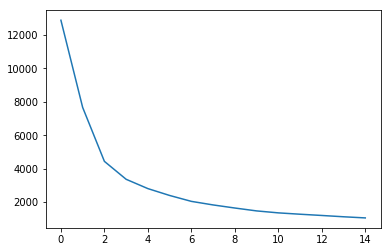

In [46]:
SSD = []
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
for item in range_n_clusters:
    kmeans = KMeans(n_clusters=item, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    SSD.append(kmeans.inertia_)
  
# plot the SSDs for each n_clusters
# ssd
plt.plot(SSD)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [50]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.47782241003860476
For n_clusters=5, the silhouette score is 0.466103965297297
For n_clusters=6, the silhouette score is 0.41753051875511704
For n_clusters=7, the silhouette score is 0.415794978066716
For n_clusters=8, the silhouette score is 0.4028024138700376


In [51]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [53]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


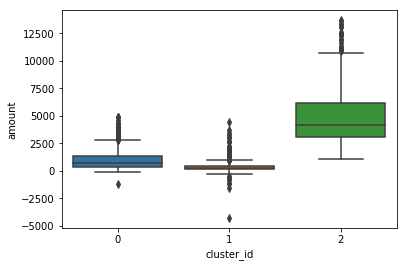

In [55]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)

# Hierarchical Clustering

In [56]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [57]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


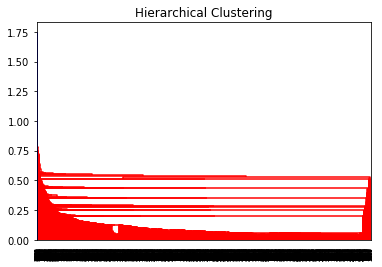

In [63]:
# single linkage
# mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
# dendrogram(mergings)
# plt.show()


mergings =  linkage(rfm_df_scaled, method =  "single", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

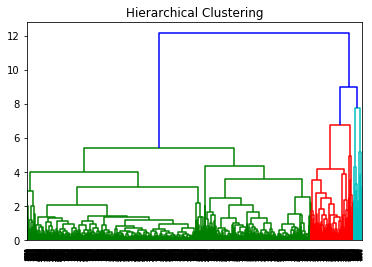

In [64]:
# single linkage
# mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
# dendrogram(mergings)
# plt.show()


mergings =  linkage(rfm_df_scaled, method =  "complete", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

In [68]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

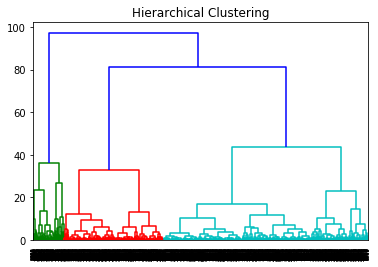

In [70]:
mergings =  linkage(rfm_df_scaled, method =  "ward", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

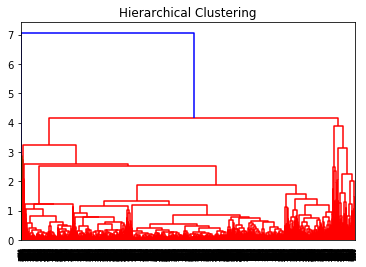

In [71]:
mergings =  linkage(rfm_df_scaled, method =  "average", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

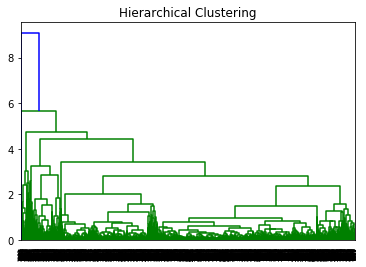

In [72]:

mergings =  linkage(rfm_df_scaled, method =  "weighted", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

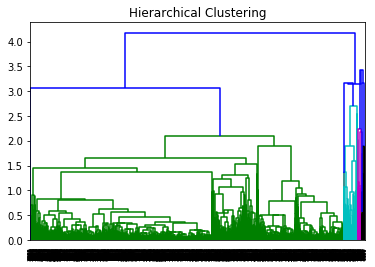

In [73]:

mergings =  linkage(rfm_df_scaled, method =  "centroid", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

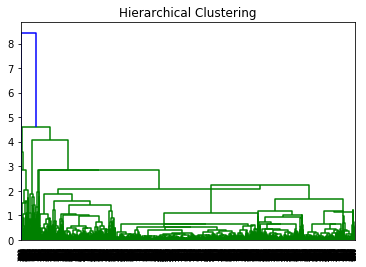

In [74]:

mergings =  linkage(rfm_df_scaled, method =  "median", metric =  "euclidean")
dendrogram(mergings)
plt.title("Hierarchical Clustering")
plt.show()

In [75]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,0
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


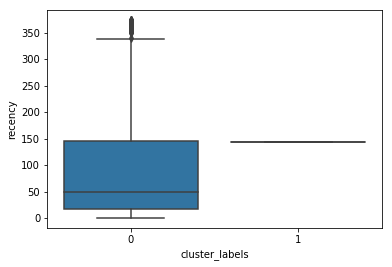

In [77]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df)

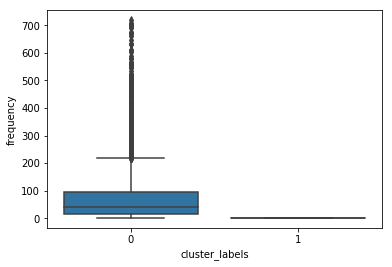

In [78]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)

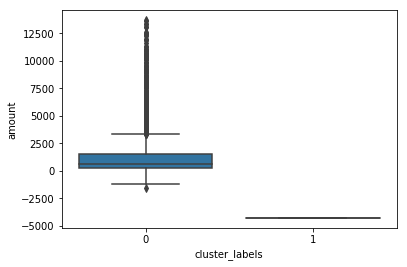

In [79]:
# plots
sns.boxplot(x='cluster_labels', y='amount', data=grouped_df)